In [1]:
import matplotlib.pyplot as plt
import numpy as np
import joblib as jl
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_hdf('../data/extended_synthetic_exps.h5')

In [3]:
data_pivae_w = data['pivae']
data_cebra = data['cebra']

In [4]:
def reindex(dic, list_name= ['poisson', 'gaussian','laplace', 'uniform', 't']):
    return pd.DataFrame(dic).T.reindex(list_name).T*100

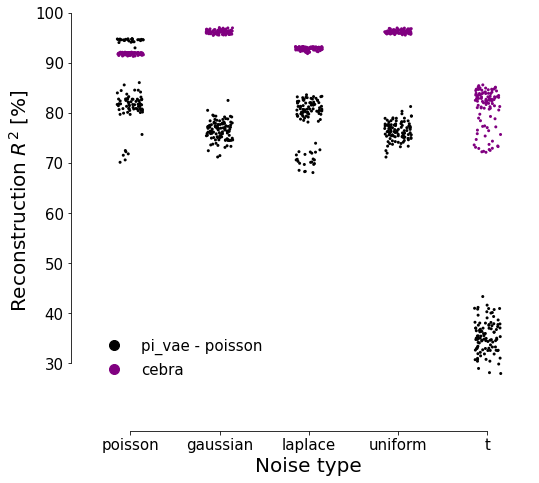

In [5]:
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
fig = plt.figure(figsize=(8,7))

ax=plt.subplot(111)

sns.stripplot(data=reindex(data_pivae_w['x-s']['poisson']), jitter=0.15, s=3, color = 'black', label = 'pi_vae')
sns.stripplot(data=reindex(data_cebra['x-s']['infonce']), jitter = 0.15, s=3, color = 'purple', label = 'cebra')




ax.set_ylabel('Reconstruction $R^2$ [%]', fontsize=20)
ax.set_xlabel('Noise type', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
legend_elements = [Line2D([0], [0],markersize=10, linestyle='none', marker = 'o', color='black', label='pi_vae - poisson'),                    
                   Line2D([0], [0], markersize=10,linestyle='none', marker = 'o', color='purple', label='cebra'),
                   ]
ax.legend(handles=legend_elements, frameon=False, fontsize=15)
sns.despine(left = False, right=True, bottom = False, top = True, trim = True, offset={'bottom':40, 'left':15})